In [1]:
import pyodbc
import pandas as pd
import swifter
import seaborn as sns
import gc
import matplotlib.pyplot as plt
from tune_sklearn import TuneGridSearchCV, TuneSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.impute import SimpleImputer
import numpy as np
import evalml
gc.collect()

1189

# Load Data

In [2]:
with pyodbc.connect('DRIVER={SQL SERVER};SERVER=SAS-CI-DB1-P') as conn:
    strq = 'SELECT DISTINCT phone\
                    , CommFlag\
                    , OrderFlag\
                    , Order_Ago\
                    , min_diff\
                    , max_diff\
                    , avg_diff\
                    , avg_check\
                    , avg_mass_check\
                    , Mean_Item_Cost\
                    , sum_amount_18\
                    , cnt_amount_18\
                    , Mass_amount_18\
                    , Parfume_AMOUNT_18\
                    , Lux_Parfume_AMOUNT_18\
                    , sum_amount_3\
                    , sum_amount_6\
                    , sum_amount_9\
                    , sum_amount_12\
                    , sum_amount_15\
                    , cnt_amount_3\
                    , cnt_amount_6\
                    , cnt_amount_9\
                    , cnt_amount_12\
                    , cnt_amount_15\
                    , Mass_amount_3\
                    , Mass_amount_6\
                    , Mass_amount_9\
                    , Mass_amount_12\
                    , Mass_amount_15\
                    , Parfume_Amount_3\
                    , Parfume_Amount_6\
                    , Parfume_Amount_9\
                    , Parfume_Amount_12\
                    , Parfume_Amount_15\
                    , Lux_Parfume_Amount_3\
                    , Lux_Parfume_Amount_6\
                    , Lux_Parfume_Amount_9\
                    , Lux_Parfume_Amount_12\
                    , Lux_Parfume_Amount_15\
                    , age\
                    , LIFECYCLE_TYPE\
                    , sex \
                    FROM ##DataSet\
                    WHERE cnt_amount_18 > 0'
    df = pd.read_sql(strq, conn)

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy


In [3]:
df.dtypes

phone                     object
CommFlag                   int64
OrderFlag                  int64
Order_Ago                float64
min_diff                 float64
max_diff                 float64
avg_diff                 float64
avg_check                float64
avg_mass_check           float64
Mean_Item_Cost           float64
sum_amount_18            float64
cnt_amount_18              int64
Mass_amount_18           float64
Parfume_AMOUNT_18        float64
Lux_Parfume_AMOUNT_18    float64
sum_amount_3             float64
sum_amount_6             float64
sum_amount_9             float64
sum_amount_12            float64
sum_amount_15            float64
cnt_amount_3               int64
cnt_amount_6               int64
cnt_amount_9               int64
cnt_amount_12              int64
cnt_amount_15              int64
Mass_amount_3            float64
Mass_amount_6            float64
Mass_amount_9            float64
Mass_amount_12           float64
Mass_amount_15           float64
Parfume_Am

In [4]:
df.head()

,phone,CommFlag,OrderFlag,Order_Ago,min_diff,max_diff,avg_diff,avg_check,avg_mass_check,Mean_Item_Cost,...,Parfume_Amount_12,Parfume_Amount_15,Lux_Parfume_Amount_3,Lux_Parfume_Amount_6,Lux_Parfume_Amount_9,Lux_Parfume_Amount_12,Lux_Parfume_Amount_15,age,LIFECYCLE_TYPE,sex
0,70000068068,0,0,10.0,NaN,NaN,NaN,1844.0000,1844.000,1844.000000,...,1844.00,1844.00,NaN,NaN,NaN,NaN,NaN,47.0,1,0.0
1,70000103922,0,0,1.0,1.0,98.0,27.0,3286.7733,3169.715,3389.485000,...,54882.42,71873.42,NaN,NaN,1754.42,1754.42,1754.42,33.0,1,0.0
2,70000142841,0,0,1.0,NaN,NaN,NaN,648.0000,NaN,324.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0
3,70001625391,0,0,12.0,141.0,141.0,141.0,7568.7500,7566.250,2522.916667,...,NaN,4973.50,NaN,NaN,NaN,NaN,NaN,38.0,1,1.0
4,70001659862,0,0,9.0,192.0,192.0,192.0,1099.0000,1099.000,732.666667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,1,0.0


In [5]:
# med = df.age.median()
# df.age = df.age.swifter.apply(lambda x: x if (x > 16) and (x < 80) else med)
# df.age = df.age.fillna(med)
# df.sex = df.sex.fillna(round(df.sex.median()))
# df.Order_Ago = df.Order_Ago.fillna(36)


In [6]:
df.head()

,phone,CommFlag,OrderFlag,Order_Ago,min_diff,max_diff,avg_diff,avg_check,avg_mass_check,Mean_Item_Cost,...,Parfume_Amount_12,Parfume_Amount_15,Lux_Parfume_Amount_3,Lux_Parfume_Amount_6,Lux_Parfume_Amount_9,Lux_Parfume_Amount_12,Lux_Parfume_Amount_15,age,LIFECYCLE_TYPE,sex
0,70000068068,0,0,10.0,NaN,NaN,NaN,1844.0000,1844.000,1844.000000,...,1844.00,1844.00,NaN,NaN,NaN,NaN,NaN,47.0,1,0.0
1,70000103922,0,0,1.0,1.0,98.0,27.0,3286.7733,3169.715,3389.485000,...,54882.42,71873.42,NaN,NaN,1754.42,1754.42,1754.42,33.0,1,0.0
2,70000142841,0,0,1.0,NaN,NaN,NaN,648.0000,NaN,324.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0
3,70001625391,0,0,12.0,141.0,141.0,141.0,7568.7500,7566.250,2522.916667,...,NaN,4973.50,NaN,NaN,NaN,NaN,NaN,38.0,1,1.0
4,70001659862,0,0,9.0,192.0,192.0,192.0,1099.0000,1099.000,732.666667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,1,0.0


In [7]:
df.describe()

,CommFlag,OrderFlag,Order_Ago,min_diff,max_diff,avg_diff,avg_check,avg_mass_check,Mean_Item_Cost,sum_amount_18,...,Parfume_Amount_12,Parfume_Amount_15,Lux_Parfume_Amount_3,Lux_Parfume_Amount_6,Lux_Parfume_Amount_9,Lux_Parfume_Amount_12,Lux_Parfume_Amount_15,age,LIFECYCLE_TYPE,sex
count,7.420322e+06,7.420322e+06,7.414587e+06,4.503399e+06,4.503399e+06,4.503399e+06,7.420322e+06,7.102164e+06,7.420322e+06,7.420322e+06,...,3.874491e+06,4.468725e+06,2.056100e+05,3.802310e+05,5.366900e+05,7.517930e+05,8.787260e+05,6.200555e+06,7.420322e+06,7.011188e+06
mean,8.305813e-01,5.812133e-02,6.117860e+00,7.642702e+01,1.655753e+02,1.139468e+02,2.648998e+03,2.385260e+03,1.924240e+03,1.355058e+04,...,1.147013e+04,1.249177e+04,8.035709e+03,8.309479e+03,8.432982e+03,8.715585e+03,8.720638e+03,3.961361e+01,9.729830e-01,1.377962e-01
std,3.751213e-01,2.339728e-01,4.373424e+00,1.023367e+02,1.026172e+02,9.232345e+01,2.668791e+03,2.361975e+03,2.217262e+03,1.516520e+05,...,1.060047e+05,1.266703e+05,1.832081e+04,2.320038e+04,2.800809e+04,3.344977e+04,3.582571e+04,1.230817e+01,1.621330e-01,3.446860e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-6.621741e+05,-6.621776e+05,-2.490100e+04,-1.324348e+06,...,-1.256750e+04,-1.256750e+04,-2.360000e+04,-9.562500e+03,-1.117500e+04,-1.297500e+04,-1.222500e+04,1.300000e+01,0.000000e+00,0.000000e+00
25%,1.000000e+00,0.000000e+00,2.000000e+00,7.000000e+00,9.100000e+01,5.100000e+01,1.093146e+03,8.900000e+02,5.411562e+02,2.045000e+03,...,2.949500e+03,2.974500e+03,2.224000e+03,2.449300e+03,2.224500e+03,1.999500e+03,1.981850e+03,3.100000e+01,1.000000e+00,0.000000e+00
50%,1.000000e+00,0.000000e+00,5.000000e+00,3.100000e+01,1.520000e+02,8.800000e+01,2.118633e+03,1.895000e+03,1.249000e+03,4.853550e+03,...,4.748500e+03,4.924500e+03,3.574500e+03,3.674300e+03,3.604300e+03,3.323800e+03,3.124500e+03,3.800000e+01,1.000000e+00,0.000000e+00
75%,1.000000e+00,0.000000e+00,1.000000e+01,1.050000e+02,2.270000e+02,1.490000e+02,3.513841e+03,3.274500e+03,2.532000e+03,1.049442e+04,...,8.449000e+03,9.094000e+03,7.198800e+03,6.661850e+03,6.515917e+03,6.488900e+03,6.439300e+03,4.700000e+01,1.000000e+00,0.000000e+00
max,1.000000e+00,1.000000e+00,1.800000e+01,5.480000e+02,5.480000e+02,5.480000e+02,1.544968e+06,1.544968e+06,9.870000e+04,2.986616e+07,...,2.956540e+07,3.149737e+07,2.310264e+06,3.188564e+06,3.188564e+06,3.188564e+06,3.188564e+06,9.300000e+01,1.000000e+00,1.000000e+00


In [8]:
df.to_csv('DataSetUpLif.csv', index = False, sep = ';')

In [8]:
#print('Median age ', med)

NameError: name 'med' is not defined

In [ ]:
del df

In [2]:
with pyodbc.connect('DRIVER={SQL SERVER};SERVER=SAS-CI-DB1-P') as conn:
    strq = 'SELECT * FROM ##Segs'
    segs = pd.read_sql(strq, conn)
display(segs.head())
print(segs.shape)

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy


,SEGMENT_N,MOBILE
0,7,79263601250
1,1,79262037864
2,1,79268635216
3,5,79139225553
4,6,79233000608


(19280083, 2)


In [3]:
segs.to_csv('segments.csv', index = False)

# EDA

In [2]:
df = pd.read_csv('DataSetUpLif.zip', sep = ';', dtype={'phone':'str'})#.merge(pd.read_csv('segments.zip', dtype= {'MOBILE':'str', 'SEGMENT_N':'int'}), left_on='phone', right_on='MOBILE').query('SEGMENT_N > 3').drop(['SEGMENT_N'
                                                                       #                                                                                                     , 'MOBILE']
                                                                      #                                                                                                    , axis = 1)

In [3]:
display(df.head())
print(df.dtypes)
print(df.shape)

,phone,CommFlag,OrderFlag,Order_Ago,min_diff,max_diff,avg_diff,avg_check,avg_mass_check,Mean_Item_Cost,...,Parfume_Amount_12,Parfume_Amount_15,Lux_Parfume_Amount_3,Lux_Parfume_Amount_6,Lux_Parfume_Amount_9,Lux_Parfume_Amount_12,Lux_Parfume_Amount_15,age,LIFECYCLE_TYPE,sex
0,70000068068,0,0,10.0,NaN,NaN,NaN,1844.0000,1844.000,1844.000000,...,1844.00,1844.00,NaN,NaN,NaN,NaN,NaN,47.0,1,0.0
1,70000103922,0,0,1.0,1.0,98.0,27.0,3286.7733,3169.715,3389.485000,...,54882.42,71873.42,NaN,NaN,1754.42,1754.42,1754.42,33.0,1,0.0
2,70000142841,0,0,1.0,NaN,NaN,NaN,648.0000,NaN,324.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0
3,70001625391,0,0,12.0,141.0,141.0,141.0,7568.7500,7566.250,2522.916667,...,NaN,4973.50,NaN,NaN,NaN,NaN,NaN,38.0,1,1.0
4,70001659862,0,0,9.0,192.0,192.0,192.0,1099.0000,1099.000,732.666667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,1,0.0


phone                     object
CommFlag                   int64
OrderFlag                  int64
Order_Ago                float64
min_diff                 float64
max_diff                 float64
avg_diff                 float64
avg_check                float64
avg_mass_check           float64
Mean_Item_Cost           float64
sum_amount_18            float64
cnt_amount_18              int64
Mass_amount_18           float64
Parfume_AMOUNT_18        float64
Lux_Parfume_AMOUNT_18    float64
sum_amount_3             float64
sum_amount_6             float64
sum_amount_9             float64
sum_amount_12            float64
sum_amount_15            float64
cnt_amount_3               int64
cnt_amount_6               int64
cnt_amount_9               int64
cnt_amount_12              int64
cnt_amount_15              int64
Mass_amount_3            float64
Mass_amount_6            float64
Mass_amount_9            float64
Mass_amount_12           float64
Mass_amount_15           float64
Parfume_Am

In [4]:
df = df.set_index('phone')
df.head()

,CommFlag,OrderFlag,Order_Ago,min_diff,max_diff,avg_diff,avg_check,avg_mass_check,Mean_Item_Cost,sum_amount_18,...,Parfume_Amount_12,Parfume_Amount_15,Lux_Parfume_Amount_3,Lux_Parfume_Amount_6,Lux_Parfume_Amount_9,Lux_Parfume_Amount_12,Lux_Parfume_Amount_15,age,LIFECYCLE_TYPE,sex
phone,,,,,,,,,,,,,,,,,,,,,
70000068068,0,0,10.0,NaN,NaN,NaN,1844.0000,1844.000,1844.000000,1844.00,...,1844.00,1844.00,NaN,NaN,NaN,NaN,NaN,47.0,1,0.0
70000103922,0,0,1.0,1.0,98.0,27.0,3286.7733,3169.715,3389.485000,108463.52,...,54882.42,71873.42,NaN,NaN,1754.42,1754.42,1754.42,33.0,1,0.0
70000142841,0,0,1.0,NaN,NaN,NaN,648.0000,NaN,324.000000,648.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0
70001625391,0,0,12.0,141.0,141.0,141.0,7568.7500,7566.250,2522.916667,15137.50,...,NaN,4973.50,NaN,NaN,NaN,NaN,NaN,38.0,1,1.0
70001659862,0,0,9.0,192.0,192.0,192.0,1099.0000,1099.000,732.666667,2198.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,1,0.0


In [5]:
any(df.isna())

True

In [6]:
df.iloc[:, 2:-3] = df.iloc[:, 2:-3].fillna(0)
df.sex = df.sex.fillna(0)
df.age = df.age.fillna(35)

In [7]:
colls = df.columns.tolist()
for coll in colls:
    if any(df[coll].isna()):
        print(coll)

In [8]:
df.iloc[:, 3:-3].head()

,min_diff,max_diff,avg_diff,avg_check,avg_mass_check,Mean_Item_Cost,sum_amount_18,cnt_amount_18,Mass_amount_18,Parfume_AMOUNT_18,...,Parfume_Amount_3,Parfume_Amount_6,Parfume_Amount_9,Parfume_Amount_12,Parfume_Amount_15,Lux_Parfume_Amount_3,Lux_Parfume_Amount_6,Lux_Parfume_Amount_9,Lux_Parfume_Amount_12,Lux_Parfume_Amount_15
phone,,,,,,,,,,,,,,,,,,,,,
70000068068,0.0,0.0,0.0,1844.0000,1844.000,1844.000000,1844.00,1,1844.0,1844.00,...,0.0,0.00,0.00,1844.00,1844.00,0.0,0.0,0.00,0.00,0.00
70000103922,1.0,98.0,27.0,3286.7733,3169.715,3389.485000,108463.52,33,95165.7,71873.42,...,13831.7,30203.47,49168.38,54882.42,71873.42,0.0,0.0,1754.42,1754.42,1754.42
70000142841,0.0,0.0,0.0,648.0000,0.000,324.000000,648.00,1,0.0,0.00,...,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00
70001625391,141.0,141.0,141.0,7568.7500,7566.250,2522.916667,15137.50,2,15132.5,15083.00,...,0.0,0.00,0.00,0.00,4973.50,0.0,0.0,0.00,0.00,0.00
70001659862,192.0,192.0,192.0,1099.0000,1099.000,732.666667,2198.00,2,2198.0,0.00,...,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00


In [9]:
df.head()

,CommFlag,OrderFlag,Order_Ago,min_diff,max_diff,avg_diff,avg_check,avg_mass_check,Mean_Item_Cost,sum_amount_18,...,Parfume_Amount_12,Parfume_Amount_15,Lux_Parfume_Amount_3,Lux_Parfume_Amount_6,Lux_Parfume_Amount_9,Lux_Parfume_Amount_12,Lux_Parfume_Amount_15,age,LIFECYCLE_TYPE,sex
phone,,,,,,,,,,,,,,,,,,,,,
70000068068,0,0,10.0,0.0,0.0,0.0,1844.0000,1844.000,1844.000000,1844.00,...,1844.00,1844.00,0.0,0.0,0.00,0.00,0.00,47.0,1,0.0
70000103922,0,0,1.0,1.0,98.0,27.0,3286.7733,3169.715,3389.485000,108463.52,...,54882.42,71873.42,0.0,0.0,1754.42,1754.42,1754.42,33.0,1,0.0
70000142841,0,0,1.0,0.0,0.0,0.0,648.0000,0.000,324.000000,648.00,...,0.00,0.00,0.0,0.0,0.00,0.00,0.00,35.0,1,0.0
70001625391,0,0,12.0,141.0,141.0,141.0,7568.7500,7566.250,2522.916667,15137.50,...,0.00,4973.50,0.0,0.0,0.00,0.00,0.00,38.0,1,1.0
70001659862,0,0,9.0,192.0,192.0,192.0,1099.0000,1099.000,732.666667,2198.00,...,0.00,0.00,0.0,0.0,0.00,0.00,0.00,21.0,1,0.0


In [10]:
m = df.iloc[:, 2:].mean()
sig = df.iloc[:, 2:].std()
df.iloc[:, 2:] = (df.iloc[:, 2:] - m) / (sig + 1e-12)

In [11]:
np.save('means.npy', m.values)
np.save('std.npy', sig.values)

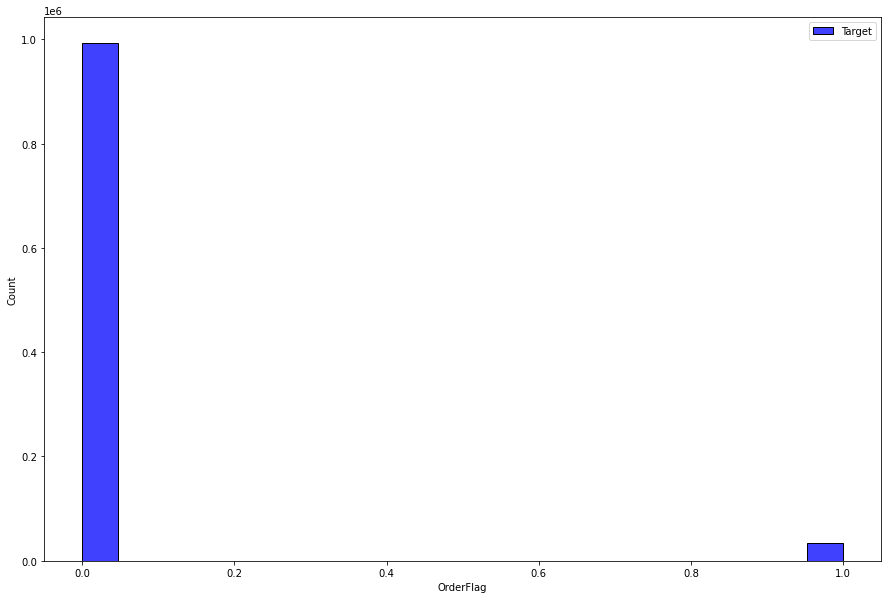

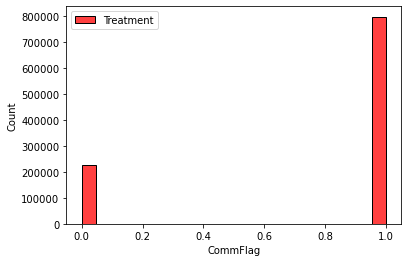

In [11]:
%matplotlib inline
fig, ax = plt.subplots(figsize = (15, 10))
sns.histplot(df.OrderFlag, label = 'Target', color = 'blue')
plt.legend()
plt.show()

sns.histplot(df.CommFlag, label = 'Treatment', color = 'red')
plt.legend()
plt.show()

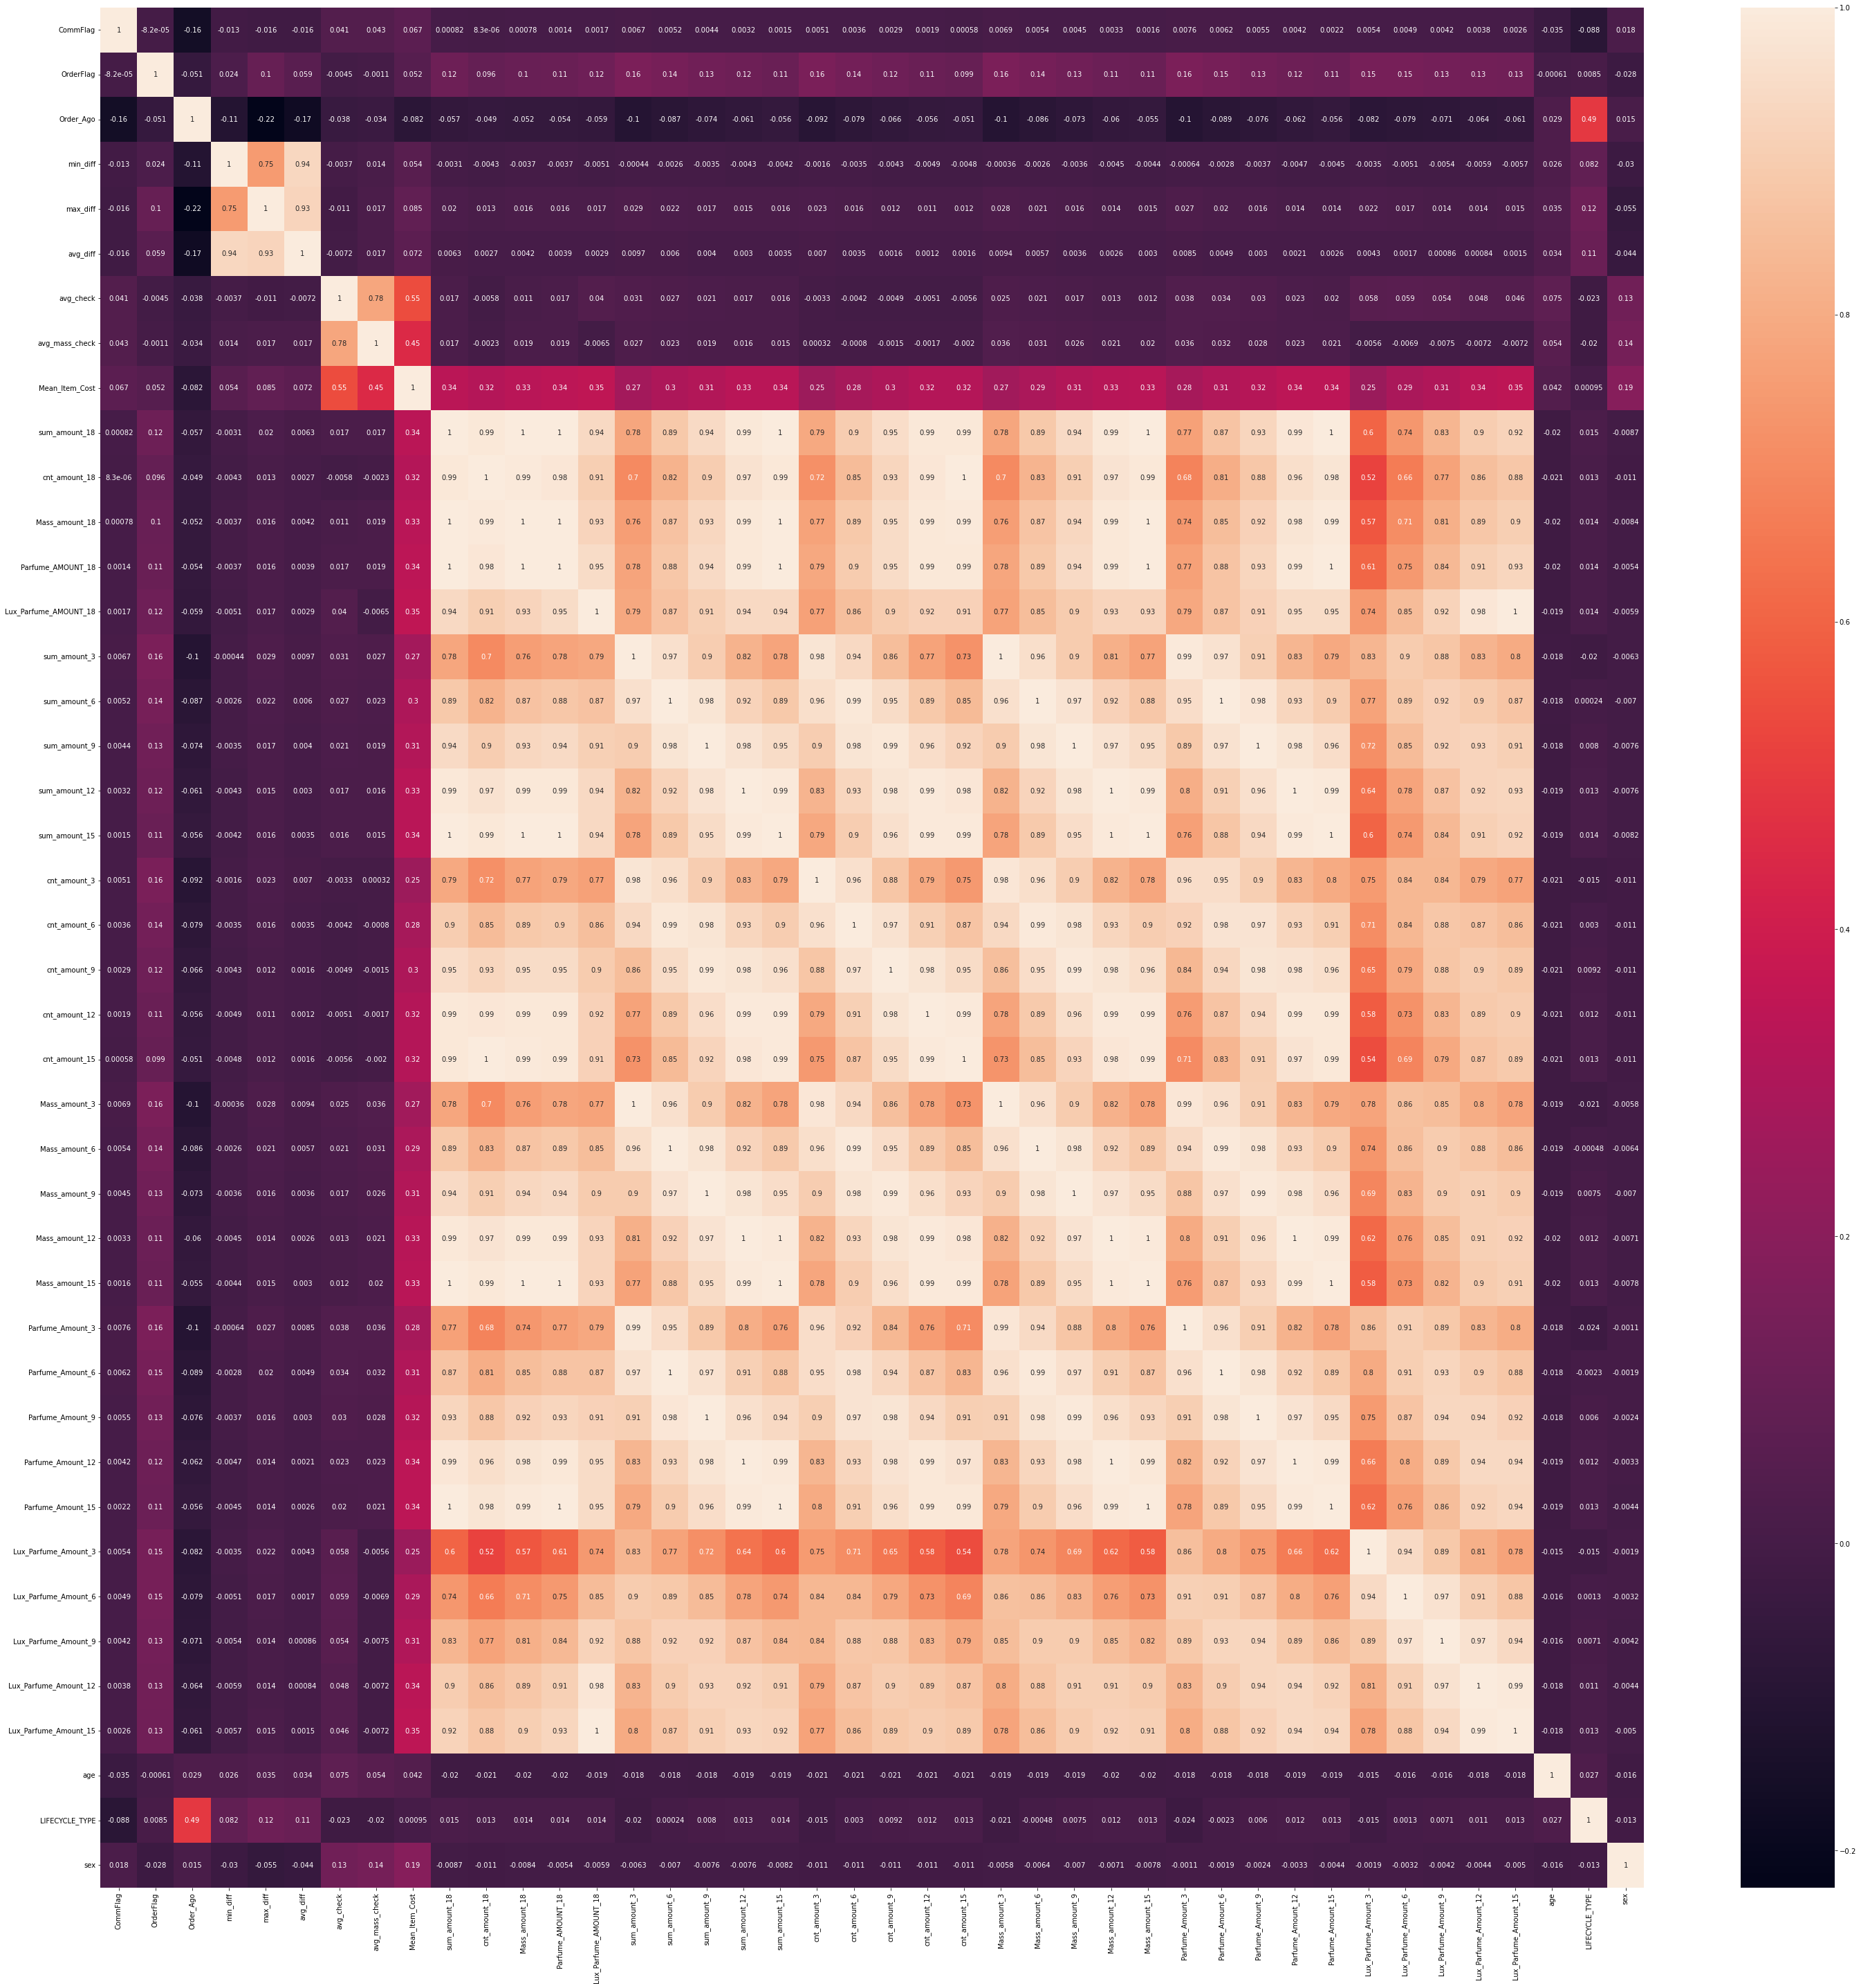

In [12]:
%matplotlib inline
fig, ax = plt.subplots(figsize = (50, 50))
corr_matrix = df.corr()

#Using heatmap to visualize the correlation matrix
sns.heatmap(corr_matrix, annot=True, ax = ax)
del corr_matrix

In [11]:
df.iloc[:, 2:].head()

,Order_Ago,min_diff,max_diff,avg_diff,avg_check,avg_mass_check,Mean_Item_Cost,sum_amount_18,cnt_amount_18,Mass_amount_18,...,Parfume_Amount_12,Parfume_Amount_15,Lux_Parfume_Amount_3,Lux_Parfume_Amount_6,Lux_Parfume_Amount_9,Lux_Parfume_Amount_12,Lux_Parfume_Amount_15,age,LIFECYCLE_TYPE,sex
phone,,,,,,,,,,,,,,,,,,,,,
70000068068,0.584456,-0.230186,-0.330547,-0.296757,-0.348662,-0.199726,-0.073328,-0.049736,-0.036753,-0.042122,...,-0.037831,-0.040715,-0.058558,-0.062101,-0.060589,-0.060348,-0.060291,1.085753,0.366372,-0.528838
70000103922,-1.339354,-0.210131,1.074046,0.197080,0.155708,0.332532,0.656455,0.639758,0.289065,0.551504,...,0.655039,0.667314,-0.058558,-0.062101,0.156101,0.093812,0.073386,-0.300888,0.366372,-0.528838
70018312398,1.011969,-0.230186,-0.330547,-0.296757,0.347132,0.599375,0.866521,-0.036865,-0.036753,-0.029461,...,-0.011830,-0.020592,-0.058558,-0.062101,-0.060589,-0.060348,-0.060291,-0.102796,0.366372,-0.528838
70059990133,1.225726,-0.230186,-0.330547,-0.296757,-0.666607,-0.564879,-0.806172,-0.031444,0.003974,-0.024130,...,-0.061920,-0.059359,-0.058558,-0.062101,-0.060589,-0.060348,-0.060291,-0.102796,0.366372,-0.528838
70080465766,-0.056814,-0.230186,-0.330547,-0.296757,0.299816,0.545033,-0.070731,-0.037740,-0.036753,-0.030322,...,-0.013598,-0.021960,-0.058558,-0.062101,-0.060589,-0.060348,-0.060291,-1.291345,0.366372,1.890937


In [12]:
y = df.iloc[:, 0:2]
p = round(y[y.CommFlag == 1].shape[0] / y.shape[0], 1) #0.5
Z = y.OrderFlag * (y.CommFlag - p) / (p * (1-p)) 
del y

gc.collect()
gc.enable()

features = df.iloc[:, 2:].columns.tolist()
X = df.iloc[:, 2:].replace(np.inf, 0).values




    

In [13]:
# for c in X.T:
#     if any(pd.isna(c)):
#         print('Ooops')


In [14]:
del df
gc.collect()

0

In [15]:
p

0.8

In [16]:
#X.head()

In [17]:
Z.describe()

count    7.420322e+06
mean     2.087157e-02
std      5.334364e-01
min     -5.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.250000e+00
dtype: float64

In [18]:
# imp_mean = SimpleImputer(missing_values=np.nan, strategy='median')
# scaler = StandardScaler()
# X = scaler.fit_transform(imp_mean.fit_transform(X))
# pd.isna(X).any()


In [19]:
# gc.collect()
# del X_test
# del X_train
# del y_test
# del y_train
# del automl

In [18]:
gc.collect()

0

In [22]:

X_train,X_test,y_train,y_test=evalml.preprocessing.split_data(X, Z,problem_type='regression')

In [23]:
# for i, c in enumerate(X_train.T):
#     if pd.isna(c):
#         print(X_train.T[i])

In [24]:
del X
del Z


In [19]:
gc.collect()
gc.enable()

In [26]:


param_grid = {
    'bootstrap': [True],
    'max_depth': [2, 4, 6, 10, 20],
    
    'min_samples_leaf': [1, 2, 3, 4, 6],
    'min_samples_split': [2, 4, 8],
    'n_estimators': [100]
}# Create a based model
rf = RandomForestRegressor(verbose = 1, n_jobs = -1)# Instantiate the grid search model
grid_search = TuneSearchCV(estimator = rf, param_distributions= param_grid, 
                           n_jobs = 4, verbose = 2)

In [ ]:
grid_search.fit(X_train, y_train)

In [28]:
best = grid_search.best_estimator_

In [ ]:
grid_search.best_params_

Best properties:<br>
{ <br>  'bootstrap': True, <br>
    'max_depth': 6,<br>
    'min_samples_leaf': 4,<br>
    'min_samples_split': 4,<br>
    'n_estimators': 100<br>
 }

# Train with best properties:<br>
{ <br>  'bootstrap': True, <br>
    'max_depth': 6,<br>
    'min_samples_leaf': 4,<br>
    'min_samples_split': 4,<br>
    'n_estimators': 100<br>
 }

In [20]:

rf = RandomForestRegressor(bootstrap=True
                           , max_depth=6
                           ,min_samples_leaf=4
                           , min_samples_split= 4
                           , n_estimators= 100
                            , verbose = 1
                            , n_jobs = -1)# Instantiate the grid search model

In [21]:
rf.fit(X, Z)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 29.7min finished


RandomForestRegressor(max_depth=6, min_samples_leaf=4, min_samples_split=4,
                      n_jobs=-1, verbose=1)

In [23]:
est = rf.estimators_[5]

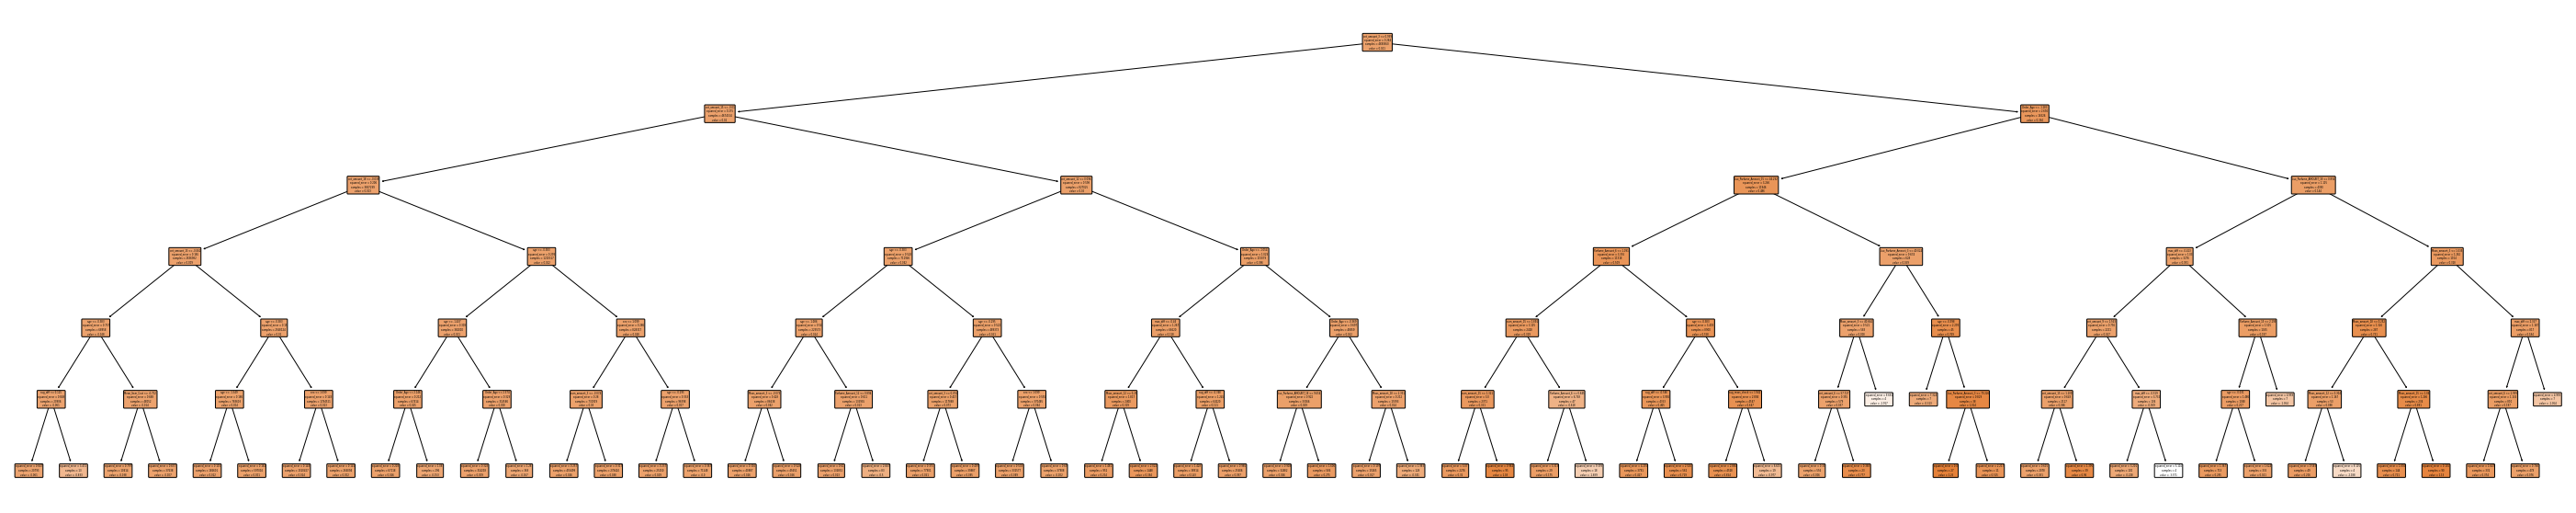

In [24]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import matplotlib as mpl


fig = plt.figure(figsize=(50, 10))
plot_tree(rf.estimators_[0], 
          feature_names=features
          
          ,filled=True, impurity=True, 
          rounded=True)
plt.savefig('tree.png', dpi = 500)


In [26]:
import joblib
filename = 'best_RandomForest.sav'
joblib.dump(rf, filename)

['best_RandomForest.sav']

# Submition

In [2]:
from sklift.metrics import uplift_at_k
import joblib

In [3]:
filename = 'best_RandomForest.sav'
loaded_model = joblib.load(filename)


In [4]:
#Submission
subm = pd.read_csv('ControlSet.zip', sep = ';',dtype={'phone':'str', 'Order_Ago':'float64'})
subm = subm.set_index('phone')
subm.head()

,CommFlag,OrderFlag,Order_Ago,min_diff,max_diff,avg_diff,avg_check,avg_mass_check,Mean_Item_Cost,sum_amount_18,...,Parfume_Amount_12,Parfume_Amount_15,Lux_Parfume_Amount_3,Lux_Parfume_Amount_6,Lux_Parfume_Amount_9,Lux_Parfume_Amount_12,Lux_Parfume_Amount_15,age,LIFECYCLE_TYPE,sex
phone,,,,,,,,,,,,,,,,,,,,,
70500241226,1,0,3.0,318.0,318.0,318.0,8154.8500,8152.3500,3261.940000,16309.70,...,NaN,10696.4,NaN,NaN,NaN,NaN,NaN,58.0,1,0.0
70501072309,1,0,3.0,18.0,175.0,83.0,853.6333,853.6333,512.180000,5121.80,...,1244.7,1244.7,NaN,NaN,NaN,NaN,NaN,35.0,1,0.0
70501363049,1,0,4.0,1.0,95.0,30.0,2836.5058,1894.8000,1607.353333,48220.60,...,3988.3,14987.8,NaN,NaN,NaN,NaN,8475.0,39.0,1,0.0
70501428157,1,0,12.0,5.0,104.0,47.0,1645.9416,1371.9916,617.228125,9875.65,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.0,1,1.0
70501787343,1,0,10.0,73.0,267.0,152.0,576.3000,347.1000,576.300000,1728.90,...,NaN,1034.7,NaN,NaN,NaN,NaN,1034.7,42.0,1,0.0


In [9]:
for r in sorted(list(zip(subm.iloc[:, 2:].columns.to_list(), loaded_model.feature_importances_)), key = lambda x: -x[1]):
    print(f'{r[0]} : {r[1]:.2%}')

cnt_amount_3 : 35.94%
cnt_amount_12 : 15.30%
age : 7.73%
Order_Ago : 7.71%
cnt_amount_15 : 6.50%
cnt_amount_6 : 3.20%
sex : 2.52%
cnt_amount_18 : 1.93%
sum_amount_3 : 1.62%
Mass_amount_3 : 1.37%
max_diff : 1.13%
Lux_Parfume_Amount_12 : 1.11%
Mean_Item_Cost : 1.05%
avg_diff : 1.00%
Lux_Parfume_Amount_9 : 0.95%
cnt_amount_9 : 0.83%
Parfume_Amount_3 : 0.72%
Lux_Parfume_AMOUNT_18 : 0.71%
Lux_Parfume_Amount_15 : 0.68%
avg_check : 0.67%
sum_amount_6 : 0.62%
sum_amount_15 : 0.55%
avg_mass_check : 0.55%
Mass_amount_6 : 0.49%
Parfume_Amount_12 : 0.48%
sum_amount_18 : 0.46%
Parfume_AMOUNT_18 : 0.45%
sum_amount_12 : 0.43%
Parfume_Amount_6 : 0.42%
Parfume_Amount_9 : 0.37%
Mass_amount_12 : 0.37%
Parfume_Amount_15 : 0.37%
sum_amount_9 : 0.35%
Lux_Parfume_Amount_3 : 0.34%
Mass_amount_9 : 0.31%
Mass_amount_18 : 0.29%
Lux_Parfume_Amount_6 : 0.22%
Mass_amount_15 : 0.18%
min_diff : 0.04%
LIFECYCLE_TYPE : 0.00%


In [5]:
subm.iloc[:, 2:-3] = subm.iloc[:, 2:-3].fillna(0)
subm.sex = subm.sex.fillna(0)
subm.age = subm.age.fillna(35)

m = np.load('means.npy')
sig = np.load('std.npy')
subm.iloc[:, 2:] = (subm.iloc[:, 2:] - m) / (sig + 1e-12)

subm.head()


,CommFlag,OrderFlag,Order_Ago,min_diff,max_diff,avg_diff,avg_check,avg_mass_check,Mean_Item_Cost,sum_amount_18,...,Parfume_Amount_12,Parfume_Amount_15,Lux_Parfume_Amount_3,Lux_Parfume_Amount_6,Lux_Parfume_Amount_9,Lux_Parfume_Amount_12,Lux_Parfume_Amount_15,age,LIFECYCLE_TYPE,sex
phone,,,,,,,,,,,,,,,,,,,,,
70500241226,1,0,-0.711567,3.085461,1.912766,2.736289,2.063051,2.486213,0.603312,0.018194,...,-0.077970,0.032222,-0.067013,-0.076551,-0.07777,-0.080516,-0.081661,1.682266,0.166635,-0.386895
70501072309,1,0,-0.711567,-0.322427,0.655248,0.152245,-0.672726,-0.605463,-0.636848,-0.055580,...,-0.061766,-0.063744,-0.067013,-0.076551,-0.07777,-0.080516,-0.081661,-0.338761,0.166635,-0.386895
70501363049,1,0,-0.482997,-0.515541,-0.048259,-0.430539,0.070259,-0.164433,-0.142918,0.228616,...,-0.026048,0.075793,-0.067013,-0.076551,-0.07777,-0.080516,0.588491,0.012722,0.166635,-0.386895
70501428157,1,0,1.345558,-0.470102,0.030886,-0.243608,-0.375847,-0.385891,-0.589471,-0.024233,...,-0.077970,-0.076382,-0.067013,-0.076551,-0.07777,-0.080516,-0.081661,1.067171,0.166635,2.584681
70501787343,1,0,0.888419,0.302352,1.464281,0.910965,-0.776643,-0.820026,-0.607930,-0.077953,...,-0.077970,-0.065876,-0.067013,-0.076551,-0.07777,-0.080516,0.000157,0.276334,0.166635,-0.386895


In [6]:
X_ = subm.iloc[:, 2:].values
X_val = subm.iloc[:, 2:]
Y_val = subm.iloc[:, [0, 1]]

In [7]:
del subm
gc.collect()

0

In [8]:
Y_val.head()

,CommFlag,OrderFlag
phone,,
70500241226,1,0
70501072309,1,0
70501363049,1,0
70501428157,1,0
70501787343,1,0


In [9]:
Y_val_subm = Y_val[(Y_val['CommFlag'] == 1) & (Y_val['OrderFlag'] == 1)]
Y_val[(Y_val['CommFlag'] == 1) & (Y_val['OrderFlag'] == 1)].shape[0]

87022

In [10]:

y_pred_1 = loaded_model.predict(X_)
y_pred_1

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    3.1s finished


array([0.0164006 , 0.04165111, 0.05366707, ..., 0.06396952, 0.00153557,
       0.00866264])

In [11]:
y_pred_1.shape

(3146151,)

<AxesSubplot:ylabel='Count'>

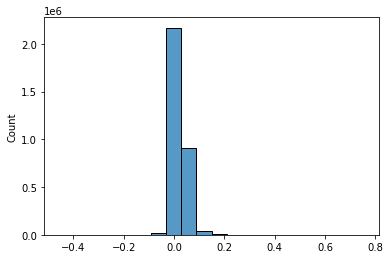

In [12]:
sns.histplot(y_pred_1, bins = 20)

In [13]:
X_val['UpLift'] = y_pred_1.tolist()

In [14]:
X_val.head()

,Order_Ago,min_diff,max_diff,avg_diff,avg_check,avg_mass_check,Mean_Item_Cost,sum_amount_18,cnt_amount_18,Mass_amount_18,...,Parfume_Amount_15,Lux_Parfume_Amount_3,Lux_Parfume_Amount_6,Lux_Parfume_Amount_9,Lux_Parfume_Amount_12,Lux_Parfume_Amount_15,age,LIFECYCLE_TYPE,sex,UpLift
phone,,,,,,,,,,,,,,,,,,,,,
70500241226,-0.711567,3.085461,1.912766,2.736289,2.063051,2.486213,0.603312,0.018194,-0.044443,0.029142,...,0.032222,-0.067013,-0.076551,-0.07777,-0.080516,-0.081661,1.682266,0.166635,-0.386895,0.016401
70501072309,-0.711567,-0.322427,0.655248,0.152245,-0.672726,-0.605463,-0.636848,-0.055580,-0.002542,-0.039979,...,-0.063744,-0.067013,-0.076551,-0.07777,-0.080516,-0.081661,-0.338761,0.166635,-0.386895,0.041651
70501363049,-0.482997,-0.515541,-0.048259,-0.430539,0.070259,-0.164433,-0.142918,0.228616,0.112685,0.127461,...,0.075793,-0.067013,-0.076551,-0.07777,-0.080516,0.588491,0.012722,0.166635,-0.386895,0.053667
70501428157,1.345558,-0.470102,0.030886,-0.243608,-0.375847,-0.385891,-0.589471,-0.024233,-0.002542,-0.020755,...,-0.076382,-0.067013,-0.076551,-0.07777,-0.080516,-0.081661,1.067171,0.166635,2.584681,0.001085
70501787343,0.888419,0.302352,1.464281,0.910965,-0.776643,-0.820026,-0.607930,-0.077953,-0.033967,-0.067346,...,-0.065876,-0.067013,-0.076551,-0.07777,-0.080516,0.000157,0.276334,0.166635,-0.386895,0.017634


In [15]:
print(X_.shape)
print(X_val.shape)

(3146151, 40)
(3146151, 41)


In [16]:
X_val_metric = X_val.merge(Y_val, on = 'phone')
print(X_val_metric.shape)
X_val_metric.head()


(3146151, 43)


,Order_Ago,min_diff,max_diff,avg_diff,avg_check,avg_mass_check,Mean_Item_Cost,sum_amount_18,cnt_amount_18,Mass_amount_18,...,Lux_Parfume_Amount_6,Lux_Parfume_Amount_9,Lux_Parfume_Amount_12,Lux_Parfume_Amount_15,age,LIFECYCLE_TYPE,sex,UpLift,CommFlag,OrderFlag
phone,,,,,,,,,,,,,,,,,,,,,
70500241226,-0.711567,3.085461,1.912766,2.736289,2.063051,2.486213,0.603312,0.018194,-0.044443,0.029142,...,-0.076551,-0.07777,-0.080516,-0.081661,1.682266,0.166635,-0.386895,0.016401,1,0
70501072309,-0.711567,-0.322427,0.655248,0.152245,-0.672726,-0.605463,-0.636848,-0.055580,-0.002542,-0.039979,...,-0.076551,-0.07777,-0.080516,-0.081661,-0.338761,0.166635,-0.386895,0.041651,1,0
70501363049,-0.482997,-0.515541,-0.048259,-0.430539,0.070259,-0.164433,-0.142918,0.228616,0.112685,0.127461,...,-0.076551,-0.07777,-0.080516,0.588491,0.012722,0.166635,-0.386895,0.053667,1,0
70501428157,1.345558,-0.470102,0.030886,-0.243608,-0.375847,-0.385891,-0.589471,-0.024233,-0.002542,-0.020755,...,-0.076551,-0.07777,-0.080516,-0.081661,1.067171,0.166635,2.584681,0.001085,1,0
70501787343,0.888419,0.302352,1.464281,0.910965,-0.776643,-0.820026,-0.607930,-0.077953,-0.033967,-0.067346,...,-0.076551,-0.07777,-0.080516,0.000157,0.276334,0.166635,-0.386895,0.017634,1,0


In [17]:
any(X_val_metric.OrderFlag.isna())

False

In [18]:
X_val_metric.CommFlag.values.min()

0

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


<AxesSubplot:title={'center':'Uplift by percentile\nweighted average uplift = 0.0046'}, xlabel='Percentile', ylabel='Uplift = treatment response rate - control response rate'>

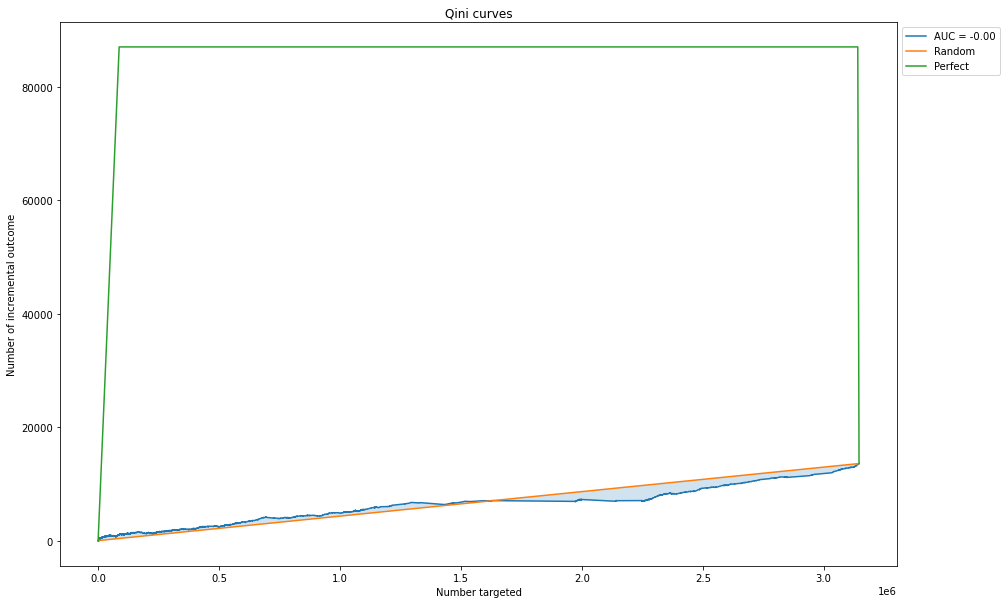

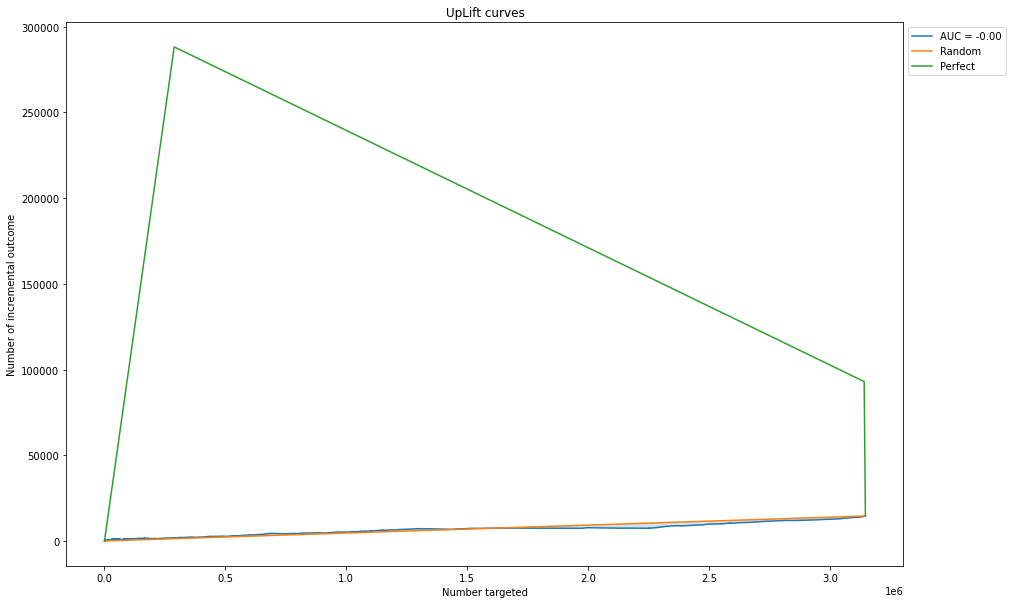

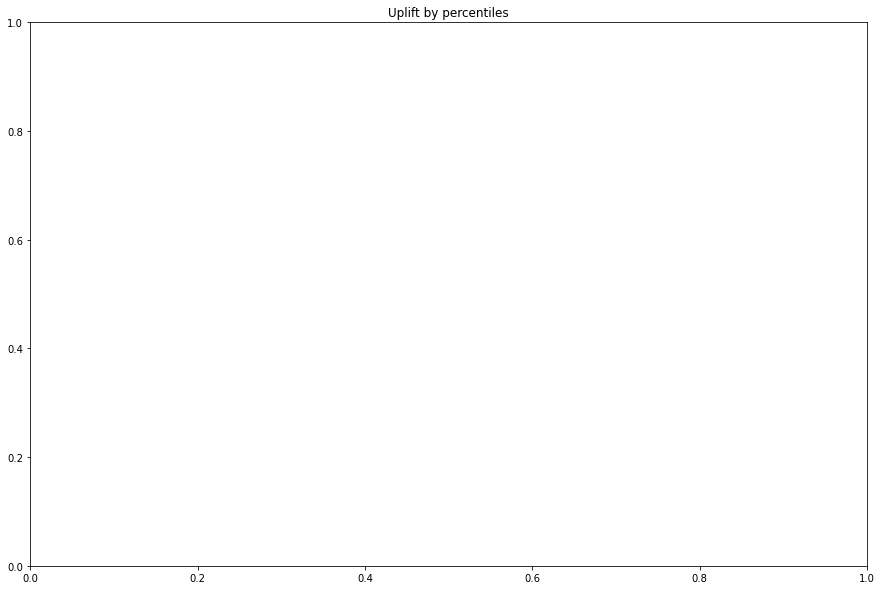

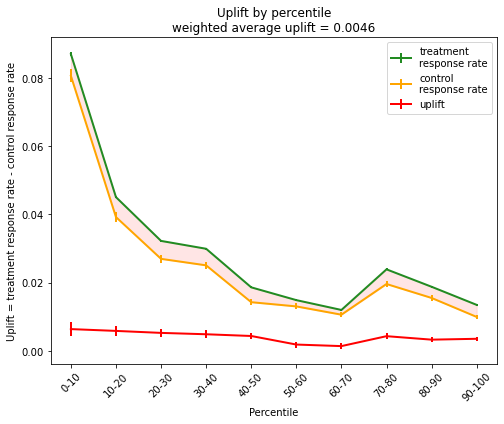

In [26]:
from sklift.viz import plot_qini_curve, plot_uplift_curve, plot_uplift_by_percentile
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (15,10))
ax.set_title('Qini curves')

plot_qini_curve(y_true = X_val_metric.OrderFlag.values
                , uplift = X_val_metric.UpLift.values
                , treatment = X_val_metric.CommFlag.values
                , perfect = True, ax = ax)


fig, ax = plt.subplots(figsize = (15,10))
ax.set_title('UpLift curves')
plot_uplift_curve(y_true = X_val_metric.OrderFlag.values
                , uplift = X_val_metric.UpLift.values
                , treatment = X_val_metric.CommFlag.values
                , perfect = True, ax = ax)



fig, ax = plt.subplots(figsize = (15,10))
ax.set_title('Uplift by percentiles')
plot_uplift_by_percentile(y_true = X_val_metric.OrderFlag.values
                , uplift = X_val_metric.UpLift.values
                , treatment = X_val_metric.CommFlag.values)


In [20]:
h = 0.1
T = int(1 / h)
s = 0.01
cr = []
ac = []
part = []
X_val = X_val.sort_values('UpLift', ascending= False)
for i in range(0, T):
    X_val_subm_i = X_val.iloc[0: round(X_val.shape[0] * s), :].merge(Y_val[Y_val['CommFlag'] == 1], on = 'phone', suffixes=('', '_y'))
    X_val_subm_i = X_val_subm_i.merge(Y_val_subm, how='left', on = 'phone', suffixes=('', '_y'))
    cr.append(X_val_subm_i[X_val_subm_i.OrderFlag == 1].shape[0] / X_val_subm_i.shape[0])
    ac.append(X_val_subm_i[X_val_subm_i.OrderFlag == 1].shape[0] / Y_val_subm.shape[0])
    part.append(s)
    del X_val_subm_i
    gc.collect()
    s += h

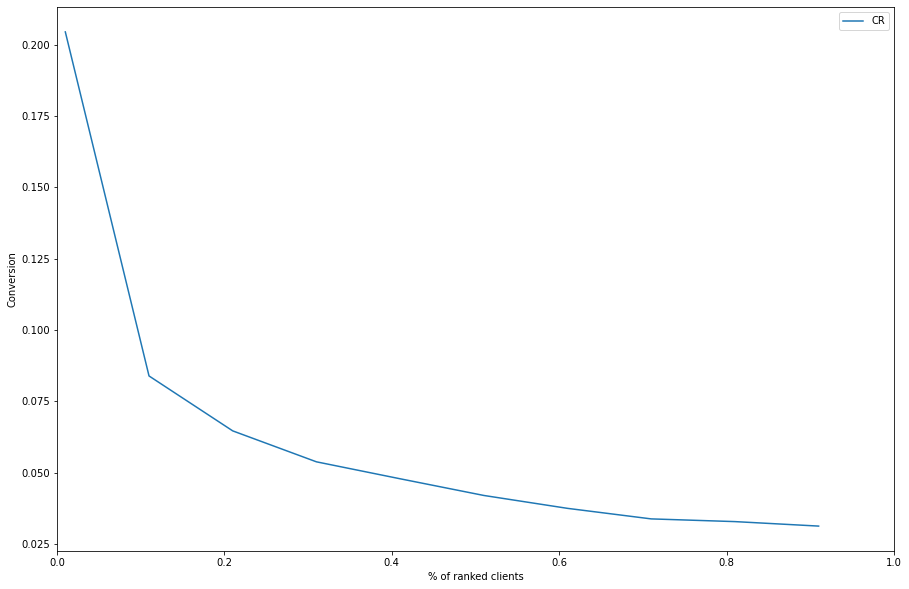

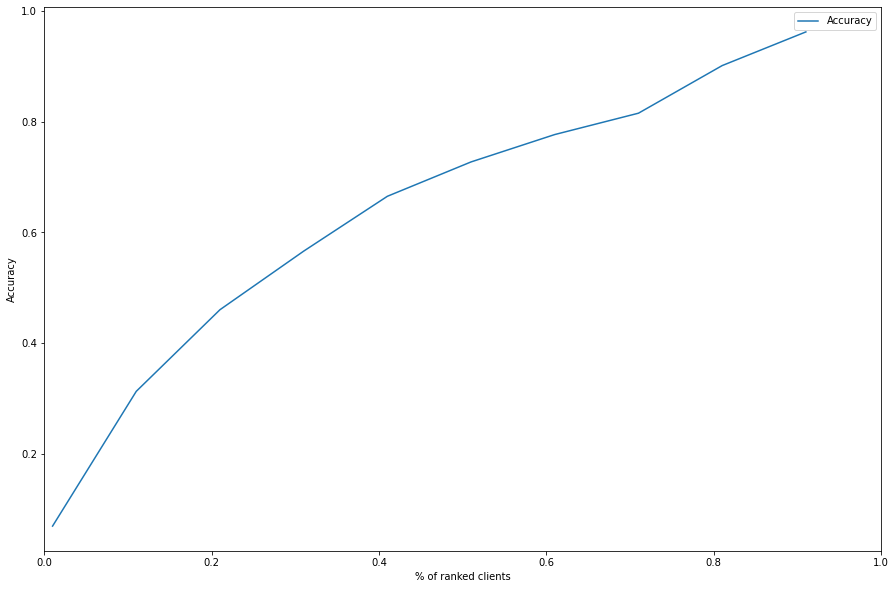

In [22]:
%matplotlib inline
fig, ax = plt.subplots(figsize = (15, 10))
plt.plot(part, cr, label = 'CR')
plt.legend()
plt.xlabel('% of ranked clients')
plt.ylabel('Conversion')

plt.xlim(0, 1)
plt.show()

%matplotlib inline
fig, ax = plt.subplots(figsize = (15, 10))
plt.plot(part, ac, label = 'Accuracy')

plt.xlim(0, 1)
plt.xlabel('% of ranked clients')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [23]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.DataFrame({'Part':part, 'CR':cr, 'ACC':ac})


,Part,CR,ACC
0,0.01,0.204450,0.069063
1,0.11,0.083864,0.312576
2,0.21,0.064614,0.460068
3,0.31,0.053769,0.565903
4,0.41,0.047825,0.665027
5,0.51,0.041980,0.727138
6,0.61,0.037459,0.776608
7,0.71,0.033764,0.815185
8,0.81,0.032815,0.901220
9,0.91,0.031243,0.962067


<p style = "font-color:blue;">
Part	CR	ACC <br>
0.10	0.115568	0.317885<br>
0.15	0.098023	0.404434<br>
0.20	0.087061	0.478943<br>
0.25	0.079196	0.544595<br>
0.30	0.072784	0.600603<br>
0.35	0.067779	0.652520<br>
0.40	0.063647	0.700270<br>
0.45	0.060014	0.742842<br>
0.50	0.056950	0.783243<br>
0.55	0.054026	0.817332<br>
0.60	0.051604	0.851656<br>
0.65	0.049165	0.879014<br>
0.70	0.047004	0.905033<br>
0.75	0.044985	0.928019<br>
0.80	0.043039	0.947082<br>
0.85	0.041261	0.964702<br>
0.90	0.039611	0.980591<br>
0.95	0.037957	0.991854<br>
1.00	0.036355	1.000000<br>
1.05	0.036355	1.000000<br>
</p>

In [73]:
Y_val[Y_val['CommFlag'] == 1].shape[0]

3306567

In [58]:
 X_val.sort_values('UpLift', ascending= False).iloc[0: round(X_val.shape[0] * s), :].merge(Y_val[Y_val['CommFlag'] == 1], on = 'phone', suffixes=('', '_y')).shape

(506975, 43)

In [30]:
X_val_subm.head()

,Order_Ago,min_diff,max_diff,avg_diff,avg_check,avg_mass_check,Mean_Item_Cost,sum_amount_18,cnt_amount_18,Mass_amount_18,...,Lux_Parfume_Amount_9,Lux_Parfume_Amount_12,Lux_Parfume_Amount_15,age,LIFECYCLE_TYPE,sex,CommFlag_x,OrderFlag_x,CommFlag_y,OrderFlag_y
phone,,,,,,,,,,,,,,,,,,,,,
79000000911,2.0,0.0,0.0,0.0,5471.0000,5471.00,5471.000000,5471.00,1,5471.00,...,0.0,0.0,0.0,NaN,0,1.0,NaN,NaN,NaN,NaN
79000001507,3.0,0.0,0.0,0.0,893.0000,893.00,893.000000,893.00,1,893.00,...,0.0,0.0,0.0,41.0,1,0.0,NaN,NaN,NaN,NaN
79000002803,12.0,43.0,43.0,43.0,4073.0833,4069.75,6109.625000,12219.25,3,12209.25,...,0.0,0.0,0.0,30.0,1,1.0,NaN,NaN,NaN,NaN
79000002888,4.0,0.0,0.0,0.0,5233.0000,5233.00,2616.500000,5233.00,1,5233.00,...,0.0,0.0,0.0,NaN,1,0.0,NaN,NaN,NaN,NaN
79000003036,6.0,137.0,137.0,137.0,2909.0000,2905.50,646.444444,5818.00,2,5811.00,...,0.0,0.0,0.0,39.0,1,1.0,NaN,NaN,NaN,NaN


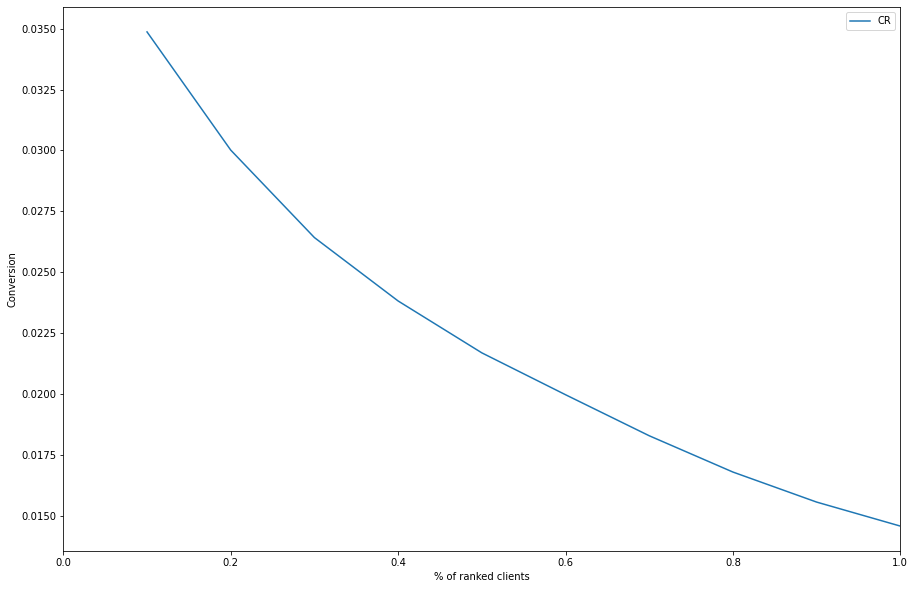

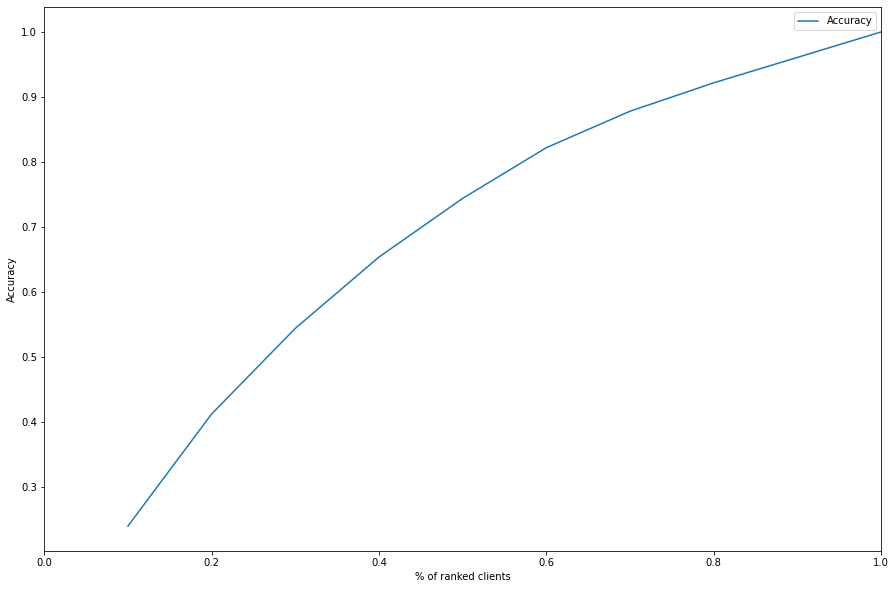

In [51]:
h = 0.1
s = 0.1
cr = []
ac = []
part = []
for i in range(0, 10):
    X_val_subm_i = X_val.sort_values('UpLift', ascending= False).iloc[0: round(X_val.shape[0] * s), :]
    X_val_subm_i = X_val_subm_i.merge(Y_val_subm, how='left', on = 'phone', suffixes=('', '_y'))
    cr.append(X_val_subm_i[X_val_subm_i.OrderFlag == 1].shape[0] / X_val_subm_i.shape[0])
    ac.append(X_val_subm_i[X_val_subm_i.OrderFlag == 1].shape[0] / Y_val_subm.shape[0])
    part.append(s)
    del X_val_subm_i
    gc.collect()
    s += h
    
    
%matplotlib inline
fig, ax = plt.subplots(figsize = (15, 10))
plt.plot(part, cr, label = 'CR')
plt.legend()
plt.xlabel('% of ranked clients')
plt.ylabel('Conversion')

plt.xlim(0, 1)
plt.show()

%matplotlib inline
fig, ax = plt.subplots(figsize = (15, 10))
plt.plot(part, ac, label = 'Accuracy')

plt.xlim(0, 1)
plt.xlabel('% of ranked clients')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [53]:
pd.DataFrame({'CR':cr, 'Part':part})

,CR,Part
0,0.136361,0.1
1,0.097872,0.2
2,0.078931,0.3
3,0.068516,0.4
4,0.060734,0.5
5,0.054218,0.6
6,0.048734,0.7
7,0.043914,0.8
8,0.039896,0.9
9,0.036616,1.0


In [79]:
del subm
del X_val
del Y_val
del X_val_subm
del Y_val_subm

NameError: name 'subm' is not defined

In [80]:
gc.collect()

8337

# Load Submission

In [2]:
with pyodbc.connect('DRIVER={SQL SERVER};SERVER=SAS-CI-DB1-P;') as conn:
    strq = 'SELECT DISTINCT phone\
                    , CommFlag\
                    , OrderFlag\
                    , Order_Ago\
                    , min_diff\
                    , max_diff\
                    , avg_diff\
                    , avg_check\
                    , avg_mass_check\
                    , Mean_Item_Cost\
                    , sum_amount_18\
                    , cnt_amount_18\
                    , Mass_amount_18\
                    , Parfume_AMOUNT_18\
                    , Lux_Parfume_AMOUNT_18\
                    , sum_amount_3\
                    , sum_amount_6\
                    , sum_amount_9\
                    , sum_amount_12\
                    , sum_amount_15\
                    , cnt_amount_3\
                    , cnt_amount_6\
                    , cnt_amount_9\
                    , cnt_amount_12\
                    , cnt_amount_15\
                    , Mass_amount_3\
                    , Mass_amount_6\
                    , Mass_amount_9\
                    , Mass_amount_12\
                    , Mass_amount_15\
                    , Parfume_Amount_3\
                    , Parfume_Amount_6\
                    , Parfume_Amount_9\
                    , Parfume_Amount_12\
                    , Parfume_Amount_15\
                    , Lux_Parfume_Amount_3\
                    , Lux_Parfume_Amount_6\
                    , Lux_Parfume_Amount_9\
                    , Lux_Parfume_Amount_12\
                    , Lux_Parfume_Amount_15\
                    , age\
                    , LIFECYCLE_TYPE\
                    , sex \
                    FROM ##DataSet\
                    WHERE cnt_amount_18 > 0'
    df = pd.read_sql(strq, conn)

pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy


In [3]:
df.head()

,phone,CommFlag,OrderFlag,Order_Ago,min_diff,max_diff,avg_diff,avg_check,avg_mass_check,Mean_Item_Cost,...,Parfume_Amount_12,Parfume_Amount_15,Lux_Parfume_Amount_3,Lux_Parfume_Amount_6,Lux_Parfume_Amount_9,Lux_Parfume_Amount_12,Lux_Parfume_Amount_15,age,LIFECYCLE_TYPE,sex
0,70500241226,1,0,3,318.0,318.0,318.0,8154.8500,8152.3500,3261.940000,...,NaN,10696.4,NaN,NaN,NaN,NaN,NaN,58.0,1,0.0
1,70501072309,1,0,3,18.0,175.0,83.0,853.6333,853.6333,512.180000,...,1244.7,1244.7,NaN,NaN,NaN,NaN,NaN,35.0,1,0.0
2,70501363049,1,0,4,1.0,95.0,30.0,2836.5058,1894.8000,1607.353333,...,3988.3,14987.8,NaN,NaN,NaN,NaN,8475.0,39.0,1,0.0
3,70501428157,1,0,12,5.0,104.0,47.0,1645.9416,1371.9916,617.228125,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.0,1,1.0
4,70501787343,1,0,10,73.0,267.0,152.0,576.3000,347.1000,576.300000,...,NaN,1034.7,NaN,NaN,NaN,NaN,1034.7,42.0,1,0.0


In [4]:
df[df.Order_Ago.isna()]

,phone,CommFlag,OrderFlag,Order_Ago,min_diff,max_diff,avg_diff,avg_check,avg_mass_check,Mean_Item_Cost,...,Parfume_Amount_12,Parfume_Amount_15,Lux_Parfume_Amount_3,Lux_Parfume_Amount_6,Lux_Parfume_Amount_9,Lux_Parfume_Amount_12,Lux_Parfume_Amount_15,age,LIFECYCLE_TYPE,sex


In [5]:
df.to_csv('ControlSet.csv', index = False, sep = ';')

In [6]:
del df

In [7]:
gc.collect()

0